# Parks

Comparing various parks in the city.

### Which parks are the most fungally diverse?

In [1]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.eda import COLORS, COLORS_DICT, nymyc_cmap, nymyc_cmap_r, read_all_csvs

# mpl.colormaps.register(cmap=nymyc_cmap)
# mpl.colormaps.register(cmap=nymyc_cmap_r)
# nymyc_palette = sns.set_palette(sns.color_palette(COLORS))

# Show all columns in DataFrames
pd.set_option('display.max_columns', None)

# Auto-reload modules
%load_ext autoreload
%autoreload 2

**Read in the data**

In [2]:
%%time
dfs = read_all_csvs('./data')
print(dfs.keys())

[*] Reading in Parks.csv...
[*] Reading in BroadGroups.csv...
[*] Reading in Parks_Properties_20241008.csv...
[*] Reading in Mushroom.csv...
[*] Reading in Walks.csv...
[*] Reading in Observations.csv...
dict_keys(['parks', 'broadgroups', 'parks_properties_20241008', 'mushroom', 'walks', 'observations'])
CPU times: user 333 ms, sys: 57.1 ms, total: 390 ms
Wall time: 411 ms


In [3]:
for table in list(dfs.keys()):
    print(table.upper())
    display(dfs[table].head())
    print('\n----------\n')

PARKS


,ParkID,ParkName,Borough,City,State
0,11,Pelham Bay Park,Bronx,New York City,NY
1,12,High Rock Park,Staten Island,New York City,NY
2,13,Prospect Park,Brooklyn,New York City,NY
3,14,Seton Falls Park,Bronx,New York City,NY
4,15,Kissena Park,Queens,New York City,NY



----------

BROADGROUPS


,BroadGroupID,BroadGroupName,BroadGroupDesc
0,1,Ascomycetes,Ascomycetes are fungi that form sexual spores ...
1,2,Toothed Fungi,Toothed Fungi are a polyphyletic group of Basi...
2,3,Boletes,NaN
3,4,Chanterelles & Allies,NaN
4,5,Coral & Club Fungi,NaN



----------

PARKS_PROPERTIES_20241008


,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,GISPROPNUM,GlobalID,JURISDICTION,LOCATION,MAPPED,NAME311,NYS_ASSEMBLY,NYS_SENATE,OBJECTID,OMPPROPID,PARENTID,PERMIT,PERMITDISTRICT,PERMITPARENT,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,URL,US_CONGRESS,WATERFRONT,ZIPCODE,Multipolygon
0,1937-06-01,249.389,NaN,Q,PARK,401403404406,1.921222e+09,Q-03,Grand Central Parkway Ext,100000441.0,Q084A,14567485-5E02-4AD0-B8B6-516D78FC8636,DPR/CDOT/SDOT,"Astoria Blvd. and 48 St. to Union Tp., Park Dr...",True,Grand Central Parkway Extension,273536.0,13141516.0,15508,Q084A,Q-03,True,Q-03,Q-03,False,114,False,Grand Central Parkway Extension,EXWY,Parkway,http://www.nycgovparks.org/parks/Q084A/,614.0,True,11103113671136811369113701137111375,MULTIPOLYGON (((-73.8587476480729 40.767414466...
1,1936-12-08,0.327,106 SOUTH 3 STREET,B,PARK,301,3.400000e+01,B-01,Berry Playground,100003860.0,B154,DD571D1C-CB51-4FD2-947F-4619889C6CA4,DPR,S. 3 St. bet. Berry St. and Bedford Ave.,True,Berry Playground,50.0,18.0,5084,B154,B-01,True,B-01,B-01,True,90,False,Berry Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B154/,7.0,False,11211,MULTIPOLYGON (((-73.96319254851623 40.71267695...
2,1935-09-23,2.525,225 NEVINS STREET,B,PARK,306,3.900000e+01,B-06,Thomas Greene Playground,100004507.0,B145,803EA01B-766F-48E0-939F-DC5F4A73BD07,DPR,"Nevins St., 3 Ave., bet. De Graw St. and Dougl...",True,Thomas Greene Playground,52.0,26.0,5083,B145,B-06,True,B-06,B-06,True,78,False,Thomas Greene Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/B145/,10.0,False,11217,MULTIPOLYGON (((-73.98430020422195 40.68021747...
3,1947-12-30,2.836,20 HOUSTON STREET,R,PARK,501,5.000000e+01,R-01,Markham Playground,100004986.0,R076,3483912E-D35D-47E7-8BEA-BC0140025A1A,DPR/DOE,"Willowbrook Pkwy., Forest Ave. to Houston St.",True,Markham Playground,61.0,24.0,5065,R076,R-01,True,R-01,R-01,True,120,False,Markham Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/R076/,11.0,False,10302,MULTIPOLYGON (((-74.14513986569457 40.62340561...
4,1955-04-21,3.593,200 ADELAIDE AVENUE,R,PARK,503,5.000000e+01,R-03,Clawson Playground,100004661.0,R072,EB27DEB0-D928-4D42-B907-6A9DE8151275,DPR/DOE,"Adelaide Ave., Clawson St.",False,Clawson Playground,64.0,24.0,5063,R072,R-03,True,R-03,R-03,True,122,False,Clawson Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/R072/,11.0,False,10306,MULTIPOLYGON (((-74.12480224365221 40.56108399...



----------

MUSHROOM


,MushroomID,BroadGroupID,Genus,Species,WhyOrWhyNot,DateCreated,DateModified
0,3,3,Cyanoboletus,pulverulentus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
1,4,3,Gyroporus,castaneus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
2,5,3,Tylopilus,ferrugineus,other,2020-04-12 16:53:56,2021-06-24 15:59:48
3,6,3,Xerocomellus,chrysenteron,other,2020-04-12 16:53:56,2021-06-24 19:00:51
4,7,5,Clavulina,cinerea,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56



----------

WALKS


,WalkID,ParkID,WalkDate,WalkDescription,WalkPhoto,DateCreated,DateModified
0,1,19,2009-06-28,This is the first walk for which we have data....,NaN,2023-12-13 21:18:04,2023-12-13 21:18:04
1,2,11,2009-07-11,,NaN,2021-06-24 20:22:14,2021-06-24 20:22:14
2,3,20,2009-07-12,,NaN,2021-08-23 16:32:49,2021-08-23 16:32:49
3,4,19,2010-06-27,,NaN,2022-10-28 14:15:11,2022-10-28 14:15:11
4,5,21,2010-08-07,,NaN,2021-08-10 23:06:38,2021-08-10 23:06:38



----------

OBSERVATIONS


,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,Notes,LinkToINat,DateCreated,DateModified
0,1,300,1,19,y,y,as Boletus campestris,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
1,2,2329,1,19,y,y,NaN,NaN,2023-12-13 21:15:44,2023-12-13 21:15:44
2,3,3,1,19,y,y,(Boletus) pulverulentus,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
3,4,4,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
4,5,5,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21



----------



In [4]:
%%time
parks = (
    dfs['observations']
    .merge(dfs['parks'], on='ParkID', how='left')
    .merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], on='MushroomID', how='left')
    .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')
    .drop(['Notes','LinkToINat','ParkID','WalkID',
           'ObservationID','DateCreated','DateModified'], axis=1)
)
parks['Genus'] = parks['Genus'].str.strip()
parks['Species'] = parks['Species'].str.strip()
parks['FullName'] = parks.apply(lambda x: f"{x['Genus']} {x['Species']}", axis=1)
parks.head()

CPU times: user 529 ms, sys: 22.9 ms, total: 552 ms
Wall time: 654 ms


,MushroomID,NewToPark,NewToCity,ParkName,Borough,City,State,BroadGroupID,Genus,Species,BroadGroupName,FullName
0,300,y,y,Central Park,Manhattan,New York City,NY,3.0,Hortiboletus,campestris,Boletes,Hortiboletus campestris
1,2329,y,y,Central Park,Manhattan,New York City,NY,3.0,Boletus,subvelutipes-complex,Boletes,Boletus subvelutipes-complex
2,3,y,y,Central Park,Manhattan,New York City,NY,3.0,Cyanoboletus,pulverulentus,Boletes,Cyanoboletus pulverulentus
3,4,y,y,Central Park,Manhattan,New York City,NY,3.0,Gyroporus,castaneus,Boletes,Gyroporus castaneus
4,5,y,y,Central Park,Manhattan,New York City,NY,3.0,Tylopilus,ferrugineus,Boletes,Tylopilus ferrugineus


In [5]:
parks.groupby('ParkName').BroadGroupName.nunique().reset_index().head()

,ParkName,BroadGroupName
0,Alley Pond Park,17
1,Beech Brook,17
2,Central Park,15
3,Clove Lakes Park,16
4,Collis P. Huntingdon Park,14


''

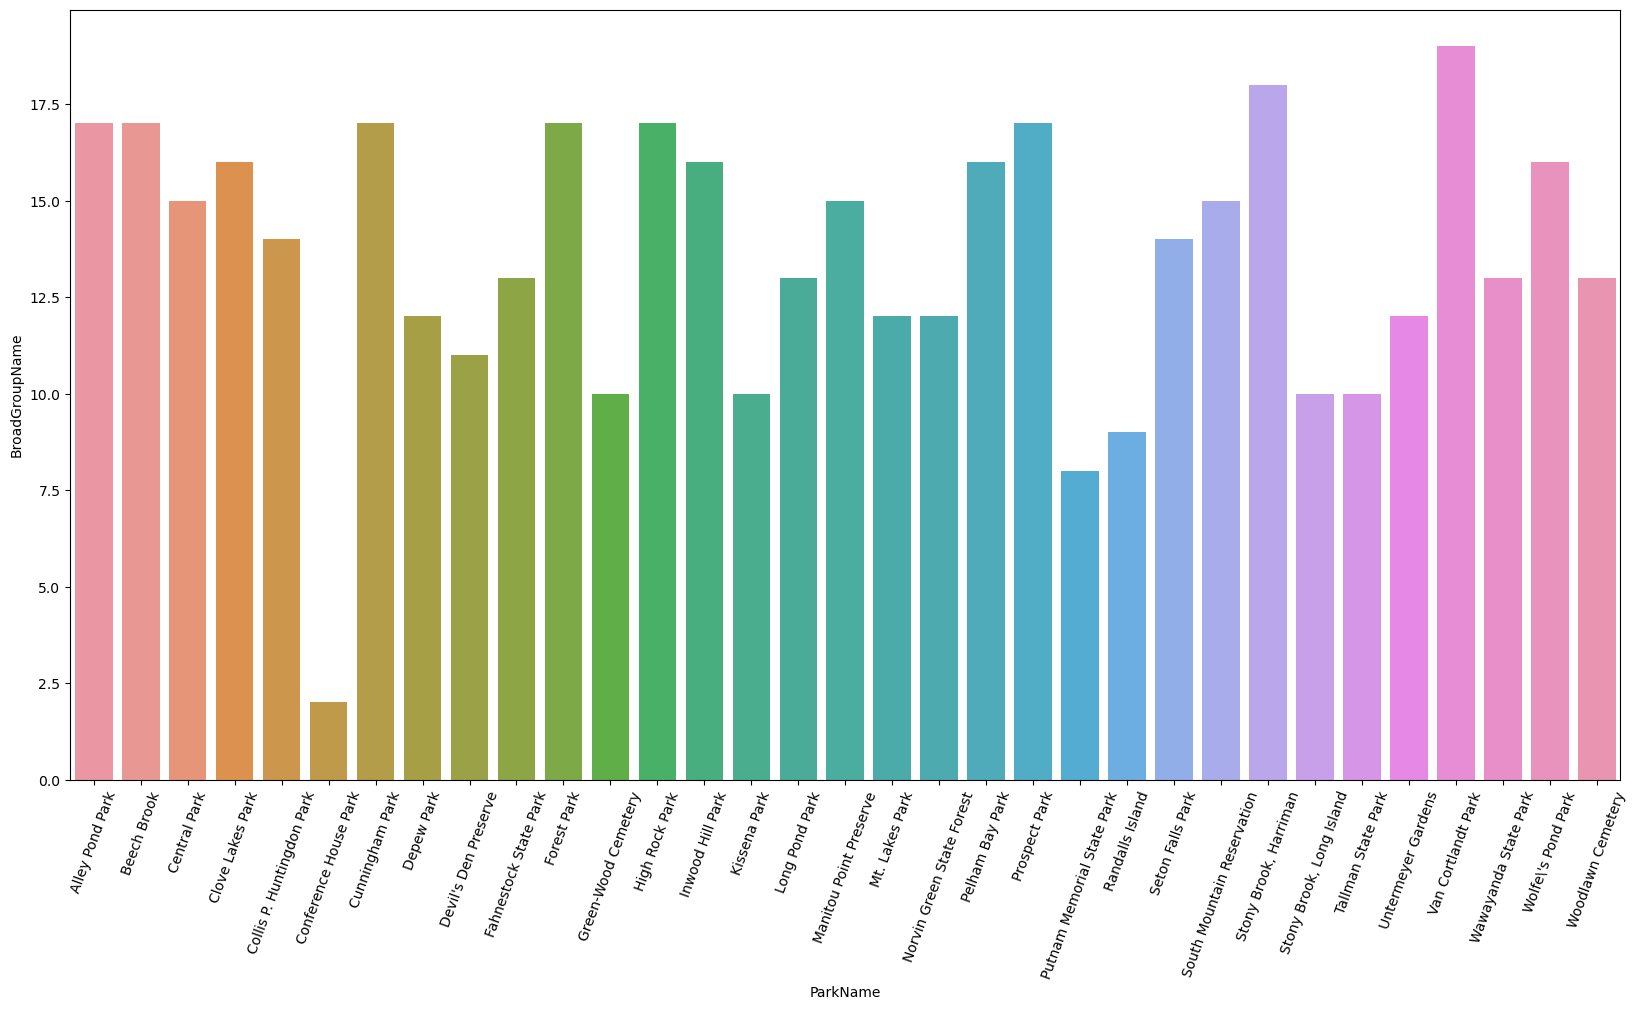

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=parks.groupby('ParkName').BroadGroupName.nunique().reset_index(),
            x='ParkName',y='BroadGroupName')
plt.xticks(rotation=70)
;

In [7]:
display(
    parks.loc[parks['NewToPark']=='y']
    .groupby(['ParkName'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=True).head()
)

ParkName           BroadGroupName    
Alley Pond Park    Gilled Fungi          168
                   Ascomycetes           126
                   Polypores              54
                   Crusts & Parchment     49
                   Myxomycetes            27
                                        ... 
Woodlawn Cemetery  Gilled Fungi          128
                   Ascomycetes            39
                   Polypores              39
                   Boletes                33
                   Gasteromycetes         20
Name: count, Length: 160, dtype: int64

Genus-species is better than broad group for diversity.

In [8]:
parks.groupby('ParkName')['FullName'].nunique().sort_values(ascending=False)

ParkName
Van Cortlandt Park            806
High Rock Park                621
Stony Brook, Harriman         616
Cunningham Park               562
Alley Pond Park               544
Inwood Hill Park              542
Pelham Bay Park               531
Beech Brook                   518
Wolfe\'s Pond Park            510
Forest Park                   492
Central Park                  472
Prospect Park                 471
Clove Lakes Park              433
South Mountain Reservation    384
Woodlawn Cemetery             349
Collis P. Huntingdon Park     261
Seton Falls Park              260
Wawayanda State Park          253
Depew Park                    243
Long Pond Park                213
Fahnestock State Park         192
Manitou Point Preserve        190
Untermeyer Gardens            189
Kissena Park                  184
Tallman State Park            174
Mt. Lakes Park                148
Green-Wood Cemetery           147
Devil's Den Preserve          145
Norvin Green State Forest     143
Randa

''

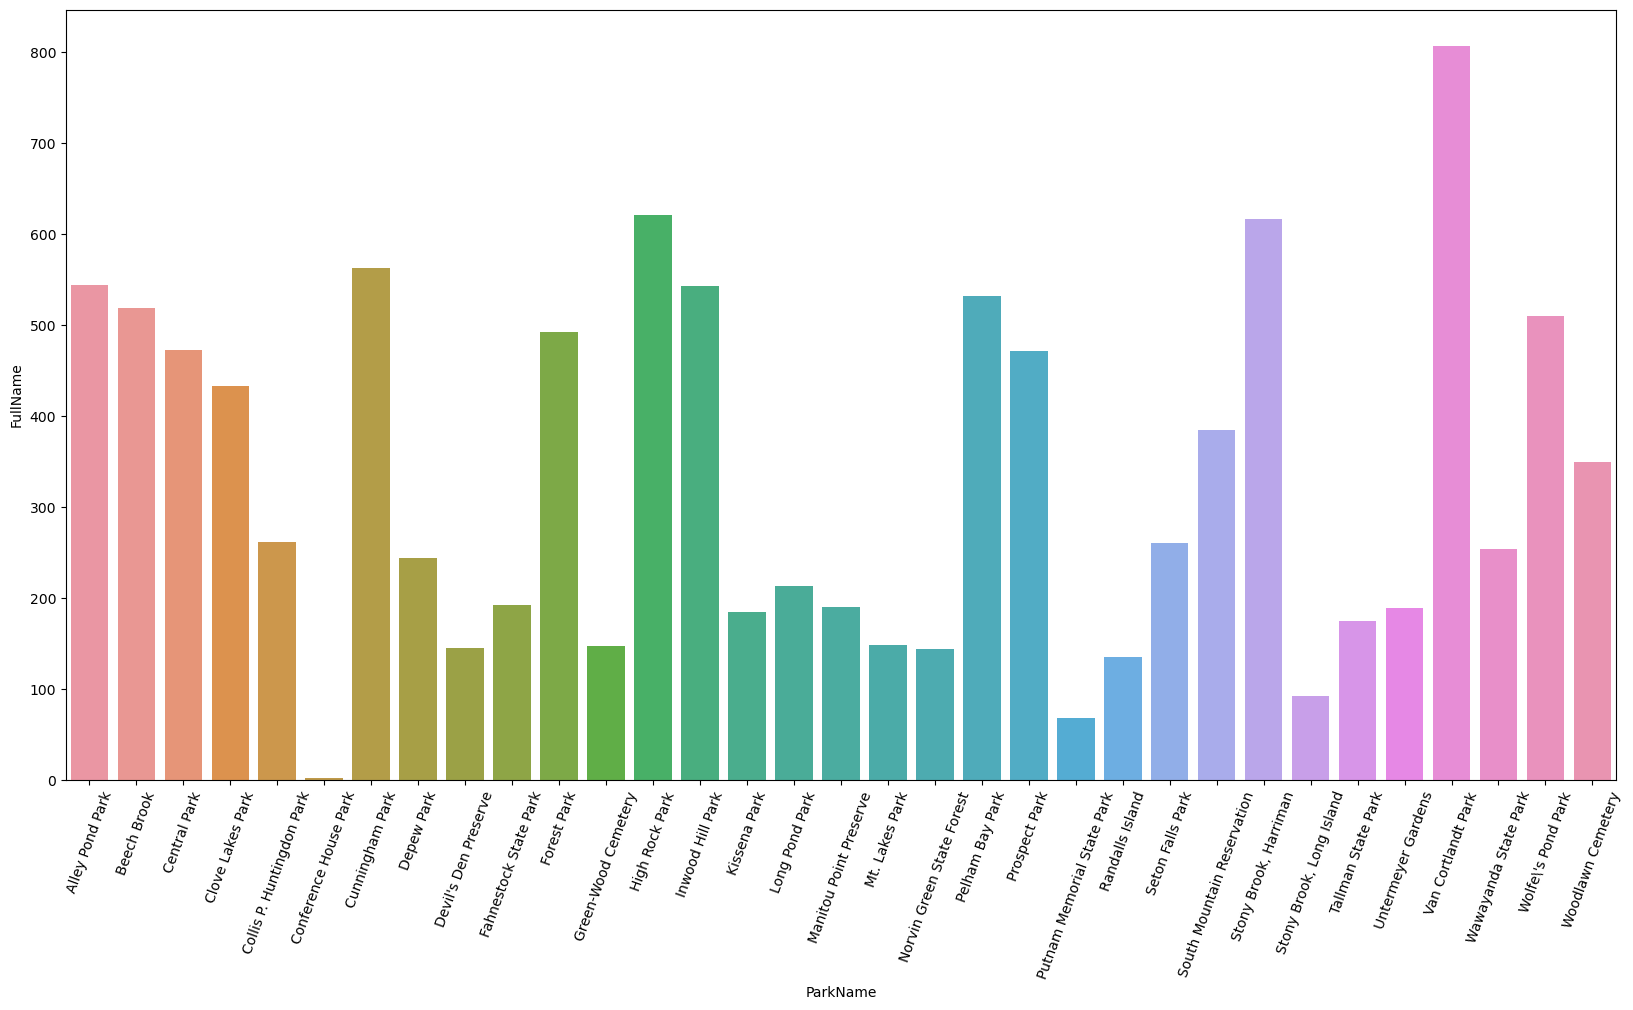

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=parks.groupby('ParkName')['FullName'].nunique().reset_index(),
            x='ParkName',y='FullName')
plt.xticks(rotation=70)
;

Can group by borough? Add a label to show?